<a href="https://colab.research.google.com/github/RainaVardhan/project_voting/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [339]:
! git clone https://github.com/DS3001/project_voting.git

fatal: destination path 'project_voting' already exists and is not an empty directory.


In [340]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/project_voting/data/county_data/0002_ds250_20205_county_M.csv', encoding='ISO-8859-1') #asked chat how to fix encoding error
df['U.S. citizen: Born in the US'] = df['AM0KM002']
df['U.S. citizen: Born abroad'] = df['AM0KM004']
df['U.S. citizen: Naturalized'] = df['AM0KM005']
df['Male'] = df['AM8FM002']
df['Female'] = df['AM8FM021']
df['18 to 30 years'] = df['AM8FM009']+df['AM8FM028']
df['35 to 64 years'] = df['AM8FM012']+df['AM8FM031']
df['65 to 74 years'] = df['AM8FM015']+df['AM8FM034']
df['75 years and over'] = df['AM8FM018']+df['AM8FM037']

virginia_county_data = df[df['STATE'] == 'Virginia']

vars_to_keep = ['COUNTY','U.S. citizen: Born in the US', 'U.S. citizen: Born abroad', 'U.S. citizen: Naturalized', 'Male', 'Female', '18 to 30 years', '35 to 64 years', '65 to 74 years', '75 years and over']
county_data = virginia_county_data[vars_to_keep]
# county_data = county_data.drop(virginia_county_data.index[0])
county_data.head()

county_data.isna().sum()
county_data = county_data.dropna()
county_data.isna().sum()
print(county_data.head())



                COUNTY U.S. citizen: Born in the US U.S. citizen: Born abroad  \
2822   Accomack County                          541                       113   
2823  Albemarle County                          936                       299   
2824  Alleghany County                          121                        96   
2825     Amelia County                          142                       122   
2826    Amherst County                          190                        77   

     U.S. citizen: Naturalized Male Female 18 to 30 years 35 to 64 years  \
2822                       295  244    222         117115         136144   
2823                       626  193    166          16785          12690   
2824                        45  137    112           6241           8473   
2825                       105  131    135          14879          18494   
2826                       132  154    169          83105          97115   

     65 to 74 years 75 years and over  
2822          54

In [341]:
df = pd.read_csv('/content/project_voting/data/voting_VA.csv')
#df.head()

# check for nan values
print(df.isnull().values.any())

# check for possible mistakes
df[df['totalvotes'] == 0]

# split the dataframe into each year
votes_2012 = df[df['year']==2012]
votes_2016 = df[df['year']==2016]
votes_2020 = df[df['year']==2020]

# find out which party got the most votes in each county
winners_2012_idx = votes_2012.groupby('county_name')['candidatevotes'].idxmax() # find maximum number of candidatevotes for county using idxmax
winners_2012 = votes_2012.loc[winners_2012_idx]
winners_2016_idx = votes_2016.groupby('county_name')['candidatevotes'].idxmax()
winners_2016 = votes_2016.loc[winners_2016_idx]
winners_2020_idx = votes_2020.groupby('county_name')['candidatevotes'].idxmax()
winners_2020 = votes_2020.loc[winners_2020_idx]

# combine the dataframes into 1
winners_all = pd.concat([winners_2012,winners_2016,winners_2020])

winners_all

votes_2016[votes_2016['county_name'] == 'BEDFORD']
# the 0 values seems to be an accidental double entry = don't have to clean

False


,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
1769,48918,2016,VIRGINIA,VA,BEDFORD,51019,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,9768,42525,20220315,TOTAL
1770,48919,2016,VIRGINIA,VA,BEDFORD,51019,US PRESIDENT,DONALD TRUMP,REPUBLICAN,30659,42525,20220315,TOTAL
1771,48920,2016,VIRGINIA,VA,BEDFORD,51019,US PRESIDENT,OTHER,OTHER,2098,42525,20220315,TOTAL
2030,49179,2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,0,0,20220315,TOTAL
2031,49180,2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,DONALD TRUMP,REPUBLICAN,0,0,20220315,TOTAL
2032,49181,2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,OTHER,OTHER,0,0,20220315,TOTAL


In [342]:
winners_2020.head()

winners_2020.to_csv('winners_2020.csv', index=False)

In [343]:
winners_2020.shape

(133, 13)

     index             COUNTY U.S. citizen: Born in the US  \
0        0           ACCOMACK                          541   
1        1          ALBEMARLE                          936   
2        2    ALEXANDRIA CITY                         1749   
3        3          ALLEGHANY                          121   
4        4             AMELIA                          142   
..     ...                ...                          ...   
128    128  WILLIAMSBURG CITY                          333   
129    129    WINCHESTER CITY                          480   
130    130               WISE                          171   
131    131              WYTHE                          176   
132    132               YORK                          707   

    U.S. citizen: Born abroad U.S. citizen: Naturalized Male Female  \
0                         113                       295  244    222   
1                         299                       626  193    166   
2                         572             

<ipython-input-345-9d8741065a1f>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData.dropna(inplace=True)


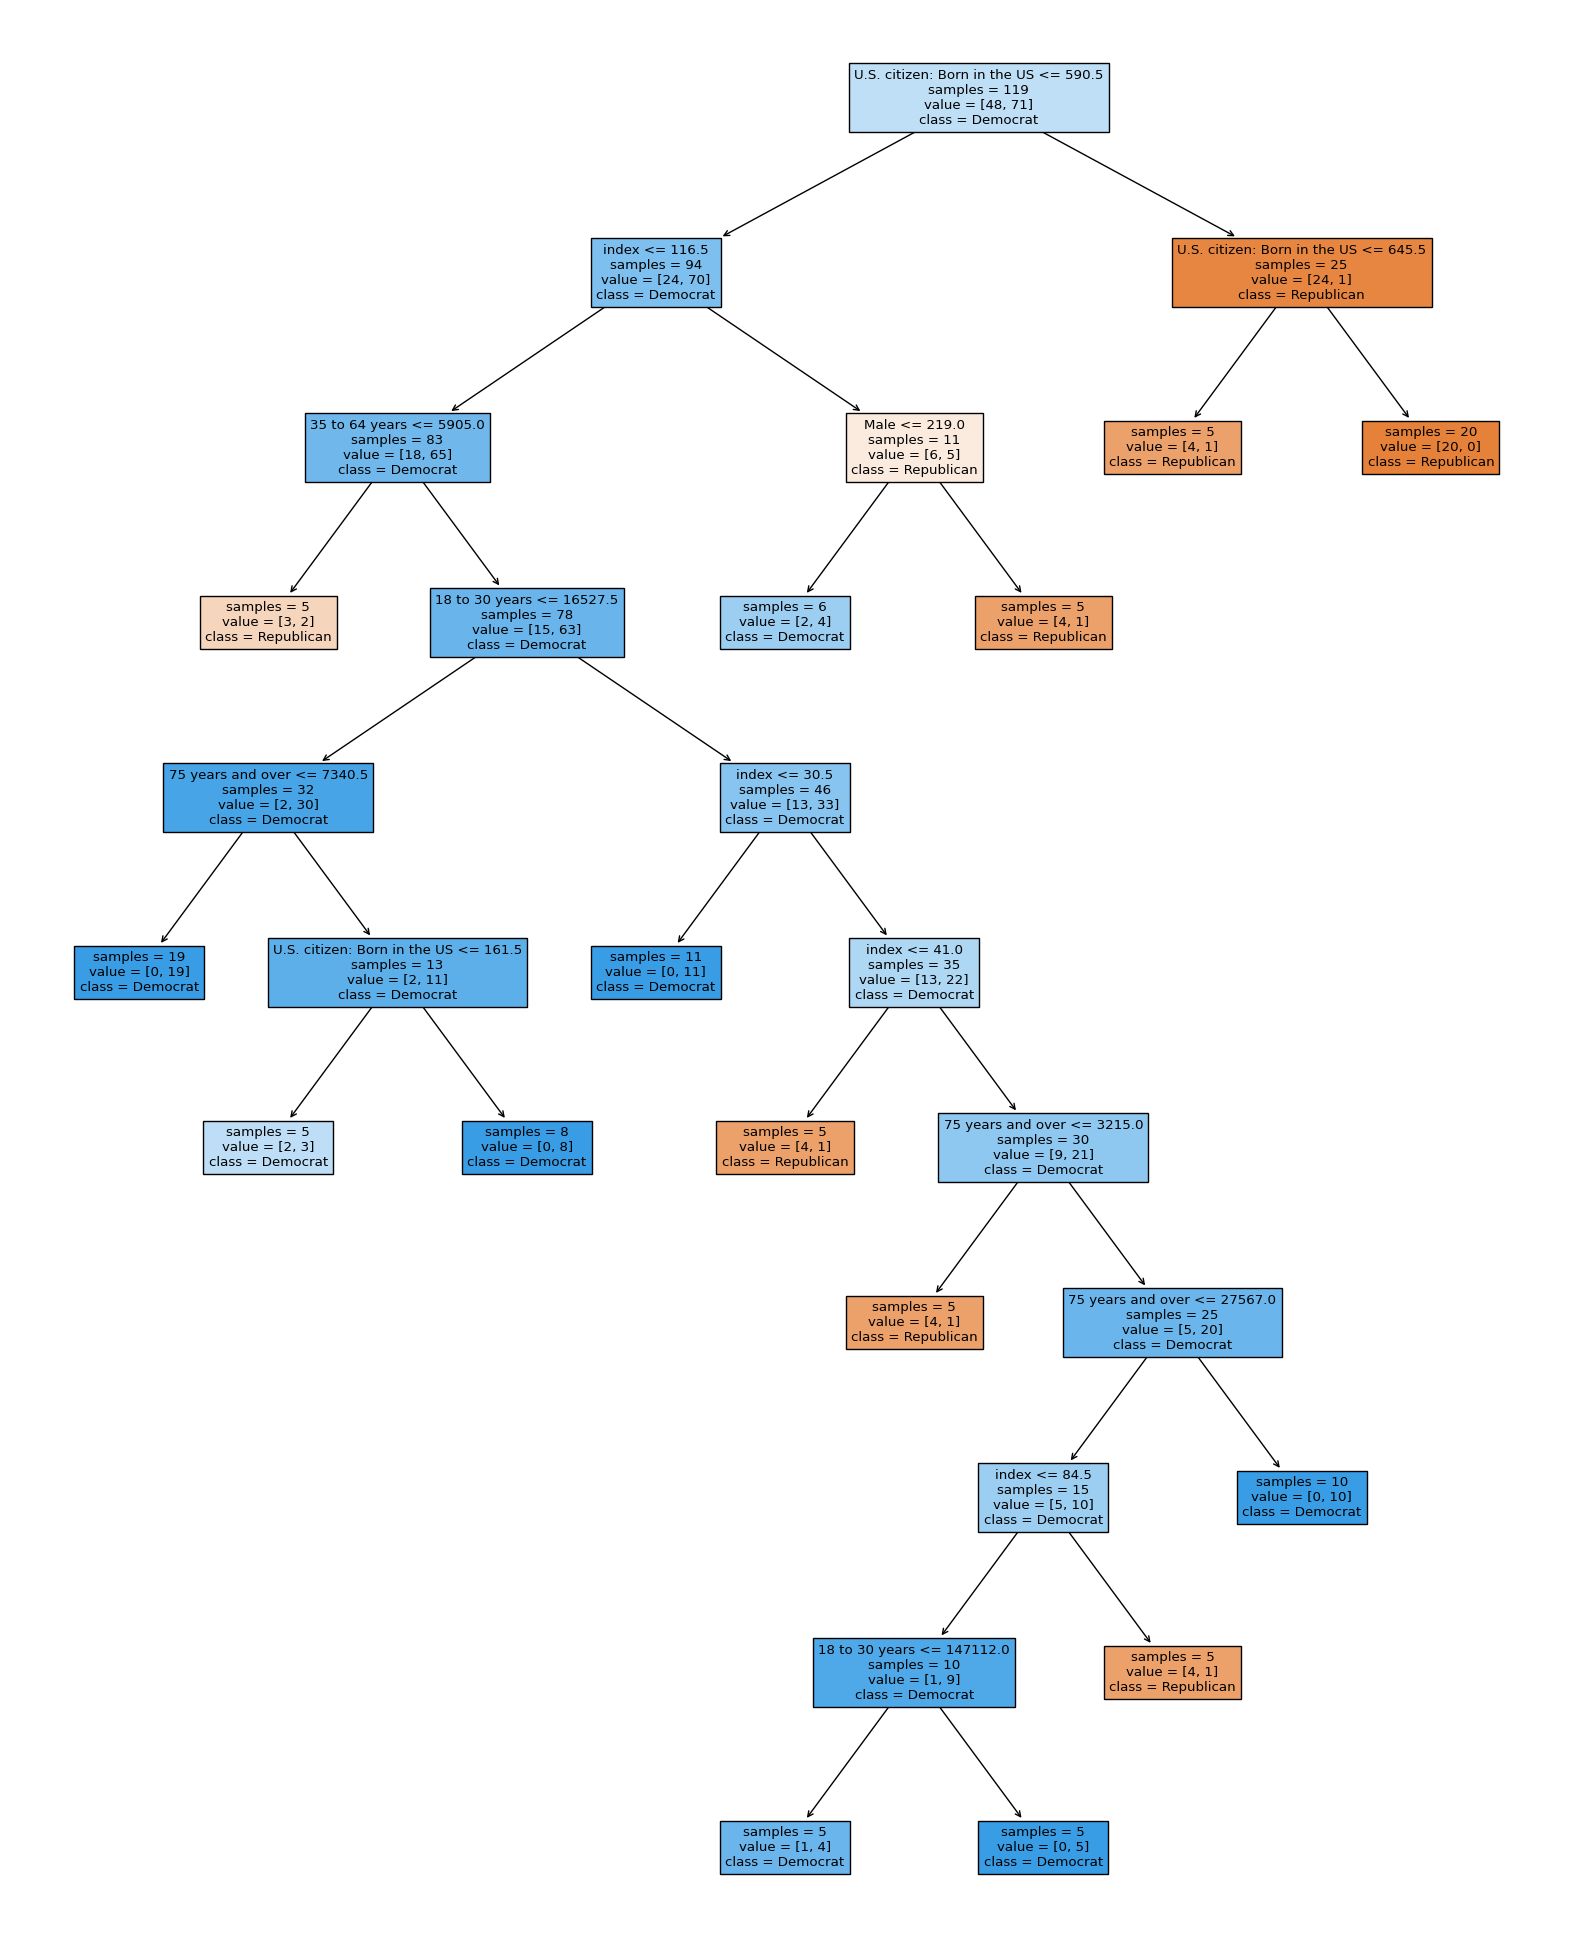

Accuracy: 0.6428571428571429


In [345]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


county_data['COUNTY'] = county_data['COUNTY'].str.replace(' County', '', case=False)



votes = winners_2020.groupby(['county_name', 'party']).agg({'candidatevotes':'sum'}).reset_index()

county_data['COUNTY'] = county_data['COUNTY'].str.upper()
county_data = county_data.sort_values(by='COUNTY', ascending=True)
votes['county_name'] = votes['county_name'].str.upper()
votes = votes.sort_values(by='county_name', ascending=True)

combined = pd.merge(county_data,votes,left_on='COUNTY', right_on='county_name', how='inner')
combined.drop('county_name', axis=1, inplace=True)
combined = combined.reset_index(drop=False)

print(combined)

combined.to_csv('combined3.csv', index=False)



# Define selected features and target variable
selected_features = ['index','U.S. citizen: Born in the US', 'Male', 'Female', '18 to 30 years', '35 to 64 years', '65 to 74 years', '75 years and over']
target_variable = 'party'

# Filter dataset to include only selected features and target variable
trainData = combined[selected_features + [target_variable]]

# Drop rows with missing values
trainData.dropna(inplace=True)

# Split training and testing data into features (X) and target variable (y)
X = trainData[selected_features]
y = trainData[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 25))
plot_tree(clf, filled=True, feature_names=selected_features, class_names= ['Republican', 'Democrat'], impurity=False)
plt.show()

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)